In [4]:
from tqdm import tqdm

import torch
import torch.nn as nn
from src.model import GraphTransformer
from torch_ema import ExponentialMovingAverage
from src.diffusion import DruM_SDE


device = torch.device('cuda:1')

n_layers = 6
input_dims = {'X': 4, 'E': 1, 'y': 1}
hidden_mlp_dims = {'X': 256, 'E': 128, 'y': 128}
hidden_dims = {'dx': 256, 'de': 64, 'dy': 64, 'n_head': 8, 'dim_ffX': 256, 'dim_ffE': 128, 'dim_ffy': 128}
output_dims = {'X': 4, 'E': 1, 'y': 1}


model = GraphTransformer(
        n_layers=n_layers,
        input_dims=input_dims,
        hidden_mlp_dims=hidden_mlp_dims,
        hidden_dims=hidden_dims,
        output_dims=output_dims,
        act_fn_in=nn.ReLU(),
        act_fn_out=nn.ReLU(),
    ).to(device)
sde = DruM_SDE().to(device)

model.load_state_dict(torch.load('ckpts/qm9_test_500epochs.pt'))

n_atoms = torch.randint(7, 10, (8, ))
#samples = sde.euler_maruyama_sample(model, device, n_atoms=n_atoms, n_steps=500)
samples = sde.predictor_corrector_sample(model, device, n_atoms=n_atoms, n_steps=1000, n_lang_steps=1)

100%|██████████| 1000/1000 [01:59<00:00,  8.39it/s]


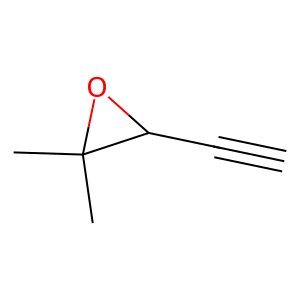

In [19]:
from src.data_utils import drop_masked, data_to_mol, mol_to_pil, valid_mol_to_pil

X, E = samples

i = 0

x, e = drop_masked(X[i], E[i])
mol = data_to_mol(x, e)
valid_mol_to_pil(mol)